In [2]:
import pandas as pd
import xarray as xr
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# read runoff, loff, L/km2/s
LOFF = xr.open_dataset('../hydro-models/04_sample_setup/02_HYPE/results/timeLOFF.nc')

# # read local streamflow, cloc, m3/s
# CLOC = xr.open_dataset('../hydro-models/04_sample_setup/02_HYPE/results/timeCLOC.nc')

# # read streamflow, cout, m3/s
# COUT = xr.open_dataset('../hydro-models/04_sample_setup/02_HYPE/results/timeCOUT.nc')



In [28]:
riv = gpd.read_file('/home/shg096/scratch/West/domain/West_riv.shp')
cat = gpd.read_file('/home/shg096/scratch/West/domain/West_cat.shp')
riv['unitarea'] = cat['unitarea']

In [31]:
riv = riv[riv['COMID'].isin(GeoData['subid'])]
riv

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,hillslope,unitarea,width,geometry
192,71029450,0.092662,0.092662,1.000000,0.007551,352.395327,3,0.7,0.007551,71029448,2,71029800,71030243,0,0,0,0.010767,19.772196,"LINESTRING (-115.60500 51.34167, -115.60500 51..."
171,71029022,0.311067,0.301052,1.033267,0.006423,731.178489,3,2.0,0.006423,71029016,2,71029071,71029992,0,0,0,0.139727,28.040312,"LINESTRING (-116.17917 51.42083, -116.18000 51..."
219,71030057,0.391146,0.288165,1.357367,0.020664,103.208295,2,8.1,0.020664,71030035,2,71031922,71032117,0,0,0,0.160818,11.159148,"LINESTRING (-115.73000 51.54000, -115.73083 51..."
222,71030156,0.149912,0.108921,1.376330,0.007326,81.010000,2,1.1,0.007326,71029225,2,71032859,71032914,0,0,0,0.186380,10.000556,"LINESTRING (-115.11000 51.84250, -115.10917 51..."
145,71028681,0.621255,0.567689,1.094357,0.005949,529.609003,2,3.7,0.005949,71028510,2,71028734,71032673,0,0,0,0.202769,24.013235,"LINESTRING (-114.65417 51.75333, -114.65417 51..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,71030308,39.794365,27.978252,1.422332,0.011360,262.807634,2,453.0,0.011360,71029042,2,71031429,71031529,0,0,0,178.907815,17.211343,"LINESTRING (-115.01667 51.26667, -115.01750 51..."
232,71030292,31.857765,21.159843,1.505577,0.005979,260.203149,2,190.8,0.005979,71029212,2,71031785,71031855,0,0,0,183.991968,17.130814,"LINESTRING (-114.86583 51.60417, -114.86667 51..."
81,71025583,36.484166,13.434171,2.715774,0.001521,194.627549,1,55.6,0.001521,71023309,0,0,0,0,0,0,194.627549,14.950898,"LINESTRING (-114.68083 52.38667, -114.68083 52..."
17,71022409,45.555612,29.862568,1.525509,0.005011,221.602658,1,228.7,0.005011,71022253,0,0,0,0,0,0,221.602658,15.886325,"LINESTRING (-114.68167 52.06667, -114.68167 52..."


In [57]:
RFF = xr.open_dataset('../hydro-models/04_sample_setup/01_MESH/results/RFF_D_GRD.nc')
RFF_slice = RFF.isel({'lat':0})
RFF_slice['RFF'].values


array([[6.9579506e+01, 7.8115112e+01, 6.9658661e+01, ..., 3.0914587e+01,
        3.8652813e+01, 3.5121911e+00],
       [4.0773044e+00, 3.5525725e+00, 3.4059098e+00, ..., 8.6662862e-03,
        6.1263945e-03, 6.8573519e-03],
       [0.0000000e+00, 6.0012290e-04, 5.8547710e-04, ..., 4.5374420e-02,
        1.9151491e-07, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [18]:
ds['RFF'][:,0,0].values

array([69.579506 ,  4.0773044,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
      dtype=float32)

array([69.579506 ,  4.0773044,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
      dtype=float32)

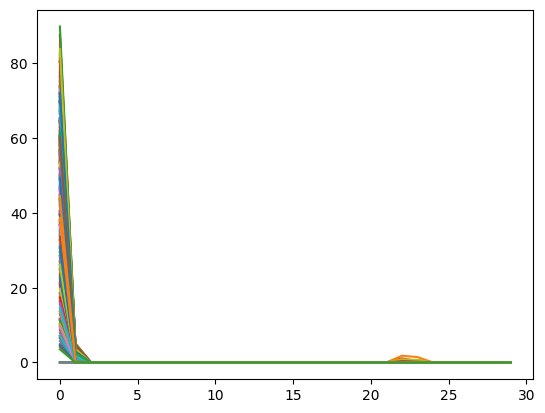

In [44]:
A = ds['RFF'][:,0,:].values
A
plt.plot(A)
A[:,0]

In [41]:
RFF_csv = pd.read_csv('../hydro-models/04_sample_setup/01_MESH/results/RFF_D.csv', header=None)
RFF_csv = RFF_csv.rename(columns={0: 'time'})
RFF_csv['time'] = pd.to_datetime(RFF_csv['time'])
RFF_csv = RFF_csv.set_index('time')
RFF_csv = RFF_csv.iloc[:, :-1] # drop the last column which is empty
#print(RFF_csv)

# loading EASYMORE
from easymore import Easymore

# initializing EASYMORE object
esmr = Easymore()

# convert csv files of discharge, its flag and station info to netCDF
Flow = esmr.dataframe_to_netcdf_xr(RFF_csv,
                                   data_frame_DateTime_column = 'time',
                                   variable_name = 'Flow',
                                   variable_dim_name = 'subbasin',
                                   unit_of_variable = 'mm day**-1',
                                   variable_long_name = 'daily runoff from MESH model',
                                   Fill_value = '-9999')

ddb = xr.open_dataset('../hydro-models/04_sample_setup/01_MESH/MESH_drainage_database.nc')

Flow['Rank'] = xr.DataArray(ddb['Rank'].values, dims=('subbasin',), name='Rank')
Flow['segID'] = xr.DataArray(ddb['subbasin'].values, dims=('subbasin',), name='subbasin')

Flow.to_netcdf('../hydro-models/04_sample_setup/01_MESH/results/RFF_D.nc')

EASYMORE version 2.0.0 is initiated.
EASYMORE detects that the input datafarame is pandas dataframe
EASYMORE detects that index is pandas datatime


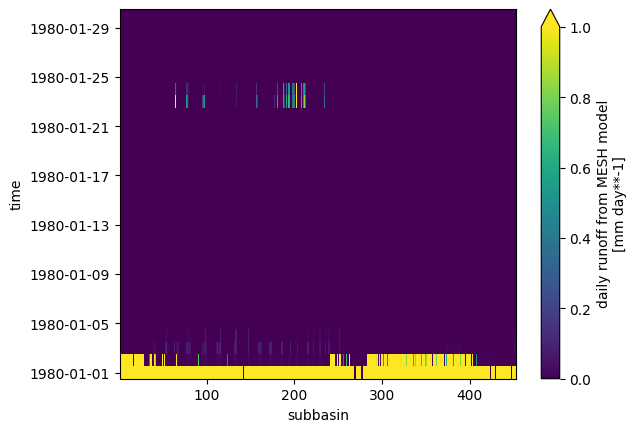

In [40]:
flow = xr.open_dataset('./test.nc')
flow['Flow'].plot(vmax =1)

In [42]:
Flow

<xarray.Dataset>
Dimensions:   (time: 30, subbasin: 453)
Coordinates:
  * time      (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-01-30
  * subbasin  (subbasin) object 1 2 3 4 5 6 7 8 ... 447 448 449 450 451 452 453
Data variables:
    Flow      (time, subbasin) float64 69.58 78.12 69.66 72.03 ... 0.0 0.0 0.0
    ID        (subbasin) int64 1 2 3 4 5 6 7 8 ... 447 448 449 450 451 452 453
    Rank      (subbasin) float64 1.0 2.0 3.0 4.0 5.0 ... 450.0 451.0 452.0 453.0
    segID     (subbasin) int64 71032106 71032073 71031850 ... 71034975 71027942

In [2]:
"""
Common functions for general tasks such as conversion of a csv file to nc for future
manupulaiton
"""

import hydrant.util.util as util        
        
data = util.mesh_output_txt_to_nc('/home/shg096/FHIMP/hydro-models/04_sample_setup/01_MESH/results/SNO_D.csv',
                             data_frame_DateTime_column = 'time',
                             variable_name = 'streamflow',
                             variable_dim_name = 'id',
                             unit_of_variable = 'm**3 s**-1',
                             variable_long_name = 'streamflow in river segments',
                             Fill_value = '-9999',
                             ddb_file = '/home/shg096/FHIMP/hydro-models/04_sample_setup/01_MESH/MESH_drainage_database.nc',
                             rank_var_ddb = 'Rank',
                             segID_var_ddb = 'subbasin',
                             nc_file_to_save = '/home/shg096/FHIMP/hydro-models/04_sample_setup/01_MESH/results/SNO_D.nc')

data

EASYMORE version 2.0.0 is initiated.
EASYMORE detects that the input datafarame is pandas dataframe
EASYMORE detects that index is pandas datatime


<xarray.Dataset>
Dimensions:     (time: 30, id: 453)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-01-30
  * id          (id) object 1 2 3 4 5 6 7 8 ... 446 447 448 449 450 451 452 453
Data variables:
    streamflow  (time, id) float64 0.06193 0.03386 0.01665 ... 12.16 10.75 15.59
    ID          (id) int64 1 2 3 4 5 6 7 8 9 ... 446 447 448 449 450 451 452 453
    Rank        (id) float64 1.0 2.0 3.0 4.0 5.0 ... 450.0 451.0 452.0 453.0
    segID       (id) int64 71032106 71032073 71031850 ... 71034975 71027942

In [ ]:
'../'

In [40]:
# loading EASYMORE for version 2.0.0 and later
from easymore import Easymore
# initializing EASYMORE object
esmr = Easymore()
 
# set the paramaters
case_name                       = 'Input_TMAX_HYPE'
source_nc_name                  = '../hydro-models/04_sample_setup/01_MESH/results/SNO_D.nc' # name of source nc file
source_nc_var_lon               = "segID" # lon in the source nc file
source_nc_var_lat               = "segID" # lat in the source nc file
source_nc_var_ID                = "segID" # ID in the source nc file
source_nc_var_time              = 'time' # variable time in the source nc file
source_nc_var_name              = 'streamflow'# variable from the source nc file
source_shp_name                 = '/home/shg096/scratch/West/domain/West_cat.shp' # source shapefile if case 3 such as station data; should be given or generated by EASYMORE
source_shp_field_ID             = "COMID" # the ID of the source shapefile
time_step_of_viz                = '1980-01-24 00:00:00' # it should be in form of 1990-02-01 00:00:00 
folder_save_fig                 = './fig/' # location where the fig should be saved
fig_size                        = (30,20) # the figure size
cmap                            = 'PuBu' #'viridis' #'PuBu' # the color 
linewidth_source                = 4 # linewidth for shapefile
edgecolor_source                = None #'k'
font_size                       = 40 # font size
font_family                     = 'Nimbus Roman'  #'Times New Roman' #  name of the font type
font_weigth                     = 'bold' # to be bold
add_colorbar_flag               = True # flag to add colorbar
min_lon,min_lat,max_lon,max_lat = None, None, None, None # if there is lat/lon to zoom in
 
# the source nc file
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_ID           = source_nc_var_ID,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            source_shp_name            = source_shp_name,              
            source_shp_field_ID        = source_shp_field_ID,
            linewidth_source           = linewidth_source,
            edgecolor_source           = edgecolor_source,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            fig_name                   = case_name+'_1.png',
            cmap                       = cmap,
            font_family                = font_family,
            add_colorbar_flag          = add_colorbar_flag,
            font_size                  = font_size,
            fig_size                   = fig_size)

EASYMORE version 2.0.0 is initiated.


SystemExit: Input source netcdf files do not exists, check the path and file patterns by source_nc

/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/ipykernel/2023a/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
import xarray as xr

ds = xr.open_dataset('../hydro-models/04_sample_setup/01_MESH/results/SNO_D.nc')
#ds['streamflow'] = ds['streamflow'].sum(dim='id')
ds

for var_name in ds.variables:
    # Check if the variable has both 'time' and 'segid' dimensions
    if 'time' in ds[var_name].dims and 'id' in ds[var_name].dims:
        ds[var_name]=ds[var_name].sum(dim='id')
    elif not 'time' in ds[var_name].dims:
        ds = ds.drop_vars(var_name)
ds

<xarray.Dataset>
Dimensions:     (time: 30)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-01-30
Data variables:
    streamflow  (time) float64 6.087 31.82 192.8 ... 7.166e+03 7.241e+03

In [10]:
df = ds.to_dataframe()

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10', '1980-01-11', '1980-01-12',
               '1980-01-13', '1980-01-14', '1980-01-15', '1980-01-16',
               '1980-01-17', '1980-01-18', '1980-01-19', '1980-01-20',
               '1980-01-21', '1980-01-22', '1980-01-23', '1980-01-24',
               '1980-01-25', '1980-01-26', '1980-01-27', '1980-01-28',
               '1980-01-29', '1980-01-30'],
              dtype='datetime64[ns]', name='time', freq=None)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<xarray.Dataset>
Dimensions:     (time: 3652, id: 453)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1989-12-30
  * id          (id) int64 1 2 3 4 5 6 7 8 9 ... 446 447 448 449 450 451 452 453
Data variables:
    streamflow  (time, id) float64 ...
    ID          (id) int64 ...
    Rank        (id) float64 ...
    segID       (id) int64 ...

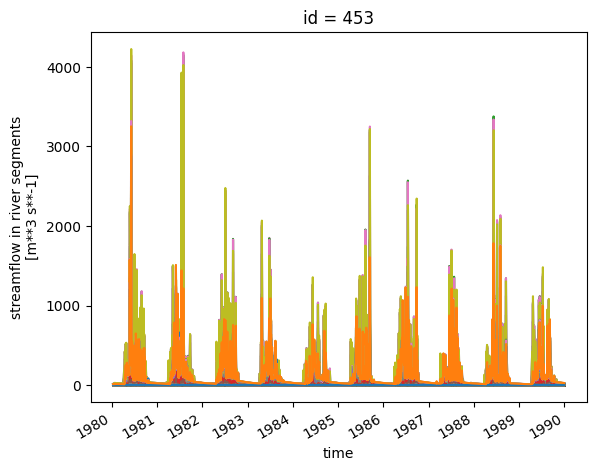

In [39]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
ds = xr.open_dataset('../hydro-models/04_sample_setup/01_MESH_test/results/QO_D.nc')
ds

# ds['streamflow'][10:,10].plot()

# RFF_csv = pd.read_csv('../hydro-models/04_sample_setup/01_MESH_test/results/QO_D.csv', header=None)
# RFF_csv.columns = RFF_csv.columns.astype(str)
# RFF_csv = RFF_csv.iloc[:, :-1] # drop the last column which is empty
# RFF_csv = RFF_csv.rename(columns={'0': 'time'})


for i in range(1,453):
    print(i)
    ds['streamflow'][10:,i].plot()

ds

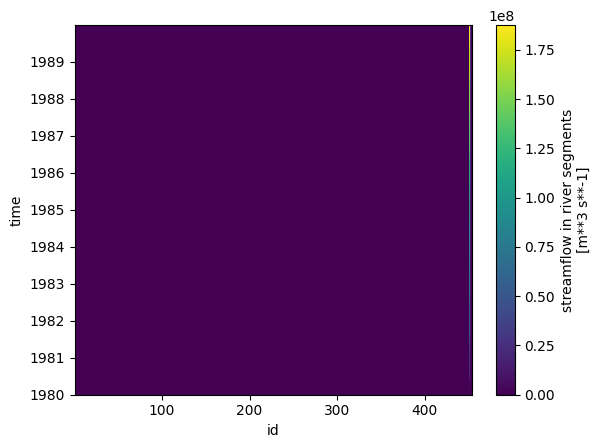

In [3]:
ds = xr.open_dataset('../hydro-models/04_sample_setup/01_MESH_test/results/QI_D.nc')
ds['streamflow'].plot()

In [24]:
RFF_csv = pd.read_csv('../hydro-models/04_sample_setup/01_MESH_test/results/QO_D.csv', header=None)
print(RFF_csv)
RFF_csv.columns = RFF_csv.columns.astype(str)
print(RFF_csv)
RFF_csv = RFF_csv.rename(columns={'0': 'time'})
print(RFF_csv)
RFF_csv['time'] = pd.to_datetime(RFF_csv['time'])
print(RFF_csv)
RFF_csv = RFF_csv.set_index('time')
RFF_csv = RFF_csv.iloc[:, :-1] # drop the last column which is empty
RFF_csv

                          0          1          2          3          4    \
0     1980/01/01 00:00:00.000  29.099760  46.940430  68.691630  85.437660   
1     1980/01/02 00:00:00.000   1.391488   1.556449   6.301216   3.757424   
2     1980/01/03 00:00:00.000   0.001615   0.007887   0.042254   0.011781   
3     1980/01/04 00:00:00.000   0.002117   0.010124   0.016781   0.014540   
4     1980/01/05 00:00:00.000   0.002630   0.012540   0.016648   0.018285   
...                       ...        ...        ...        ...        ...   
3647  1989/12/26 00:00:00.000   0.000327   0.000597   0.001204   0.001046   
3648  1989/12/27 00:00:00.000   0.000326   0.000596   0.001202   0.001044   
3649  1989/12/28 00:00:00.000   0.000326   0.000595   0.001200   0.001043   
3650  1989/12/29 00:00:00.000   0.000325   0.000594   0.001198   0.001041   
3651  1989/12/30 00:00:00.000   0.000325   0.000593   0.001196   0.001040   

            5           6          7           8           9    ...  \
0   

,1,2,3,4,5,6,7,8,9,10,...,444,445,446,447,448,449,450,451,452,453
time,,,,,,,,,,,,,,,,,,,,,
1980-01-01,29.099760,46.940430,68.691630,85.437660,48.103070,189.856500,46.529830,250.518200,116.180700,319.239500,...,36.693390,92.947170,831.06900,49.583660,902.25540,14.842340,740.58690,0.0,0.0,755.42930
1980-01-02,1.391488,1.556449,6.301216,3.757424,2.161762,17.384070,2.110856,22.829410,7.179383,30.638200,...,1.484381,104.987800,1508.45700,7.362593,1604.53800,0.023323,1498.75100,0.0,0.0,1498.77500
1980-01-03,0.001615,0.007887,0.042254,0.011781,0.005196,0.101789,0.006453,0.133959,0.025248,0.181073,...,0.072470,8.937750,1836.69100,0.196807,1853.84700,0.020892,1869.99200,0.0,0.0,1870.01300
1980-01-04,0.002117,0.010124,0.016781,0.014540,0.006882,0.044905,0.007739,0.057832,0.019045,0.073546,...,0.096261,1.160992,896.97050,0.173903,910.76850,0.028761,1131.52900,0.0,0.0,1131.55800
1980-01-05,0.002630,0.012540,0.016648,0.018285,0.008463,0.047413,0.009660,0.060788,0.022766,0.075945,...,0.122293,0.878911,207.39530,0.219071,211.56620,0.035749,247.96590,0.0,0.0,248.00170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989-12-26,0.000327,0.000597,0.001204,0.001046,0.000341,0.002783,0.000349,0.003322,0.000688,0.003876,...,0.138783,1.808647,23.62230,0.282392,25.43882,0.040751,25.92341,0.0,0.0,25.96416
1989-12-27,0.000326,0.000596,0.001202,0.001044,0.000340,0.002778,0.000349,0.003317,0.000688,0.003871,...,0.138327,1.800483,23.47305,0.281395,25.28136,0.040587,25.76412,0.0,0.0,25.80471
1989-12-28,0.000326,0.000595,0.001200,0.001043,0.000340,0.002774,0.000348,0.003312,0.000687,0.003865,...,0.137870,1.792245,23.32479,0.280397,25.12482,0.040424,25.60581,0.0,0.0,25.64623


In [7]:
import geopandas as gpd

cat = gpd.read_file('/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/7020014250-basins-gpkg')
riv = gpd.read_file('/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/7020014250-streamnet-gpkg')


,LINKNO,DSLINKNO,USLINKNO1,USLINKNO2,DSNODEID,strmOrder,Length,Magnitude,DSContArea,strmDrop,Slope,StraightL,USContArea,WSNO,DOUTEND,DOUTSTART,DOUTMID,geometry,linkage
0,4,-1,-1,-1,-1,1,2145.8,1,7132945.5,22.47,0.010474,1475.8,4894373.0,4,0.0,2145.8,1072.9,"LINESTRING (-136.38242 59.87578, -136.38242 59...",0
1,5,5957,-1,-1,-1,1,966.1,1,5473623.5,14.00,0.014491,785.8,4786316.5,5,133582.2,134548.0,134065.1,"LINESTRING (-136.35774 59.85511, -136.35788 59...",0
2,1988,5957,-1,-1,-1,1,2720.4,1,6699614.0,77.75,0.028580,1753.6,4321760.5,1988,133582.2,136302.2,134942.2,"LINESTRING (-136.35774 59.85511, -136.35774 59...",0
3,6,-1,-1,-1,-1,1,582.6,1,6071805.5,0.00,0.000000,509.5,4405845.5,6,0.0,582.6,291.3,"LINESTRING (-136.28384 59.84944, -136.28398 59...",0
4,1989,5959,-1,-1,-1,1,4920.8,1,12996875.0,152.57,0.031006,2983.1,4271482.0,1989,131558.3,136477.8,134018.0,"LINESTRING (-136.34596 59.84011, -136.34582 59...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168311,5941,9908,1976,1973,-1,2,3441.3,2,26031982.0,32.43,0.009425,2749.9,21656622.0,5941,1710250.9,1713687.1,1711969.0,"LINESTRING (-116.22781 41.23717, -116.22795 41...",0
168312,1973,5941,-1,-1,-1,1,3702.6,1,9559111.0,58.31,0.015749,2868.4,4294961.5,1973,1713687.1,1717385.5,1715536.2,"LINESTRING (-116.25109 41.21973, -116.25123 41...",0
168313,1976,5941,-1,-1,-1,1,4766.2,1,12082514.0,121.92,0.025579,3773.0,4446166.5,1976,1713687.1,1718448.2,1716067.8,"LINESTRING (-116.25109 41.21973, -116.25109 41...",0
168314,1974,3958,-1,-1,-1,1,1867.2,1,6923594.0,85.43,0.045752,1573.6,4335529.0,1974,1710214.9,1712079.1,1711147.0,"LINESTRING (-116.19556 41.21461, -116.19542 41...",0


36

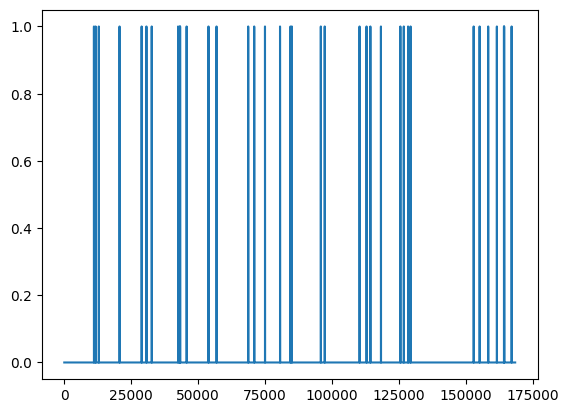

In [12]:
riv['linkage'].plot()
sum(riv['linkage'].values)

In [8]:
cat

,streamID,geometry
0,4,"POLYGON ((-136.34856 59.89617, -136.34842 59.8..."
1,5,"POLYGON ((-136.38403 59.87272, -136.38333 59.8..."
2,6,"MULTIPOLYGON (((-136.30158 59.82061, -136.3015..."
3,7,"MULTIPOLYGON (((-136.48739 59.81017, -136.4873..."
4,8,"POLYGON ((-136.62720 59.85906, -136.62664 59.8..."
...,...,...
168275,329055,"MULTIPOLYGON (((-113.46332 43.84101, -113.4633..."
168276,331039,"POLYGON ((-113.45786 43.89357, -113.45772 43.8..."
168277,333023,"POLYGON ((-121.45634 43.86357, -121.45564 43.8..."
168278,335007,"POLYGON ((-111.89257 43.85823, -111.89243 43.8..."


In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import geopandas as gpd
import os
import sys

def tdx_read_file  (codes:list,
                    path_riv: str,
                    riv_file_template: str,
                    path_cat: str,
                    cat_file_template: str,
                    prepare_for_ntopo = True):
    
    # initializaing empty geodataframe
    cat_all = gpd.GeoDataFrame()
    riv_all = gpd.GeoDataFrame()
    
    for code in codes:
        
        # read files cat, riv, cst
        riv = gpd.read_file(os.path.join(path_riv, riv_file_template.replace('*', code)))
        cat = gpd.read_file(os.path.join(path_cat, cat_file_template.replace('*', code)))
        
        # check if the length of riv is larger or equal to cat
        if len(riv) < len(cat):
            sys.exit('the length of river is smaller than the length of cat')
        
        # add hillslope
        cat ['hillslope'] = 0
        
        # add pfaf to riv and cat
        riv['pfafcode'] = int(code)
        cat['pfafcode'] = int(code)
        
        if prepare_for_ntopo:
        
            # identify the linkage
            riv, cat = tdx_identify_linkage(riv, cat)

            # remove of linkages
            riv = tdx_contraction_of_linkage(riv)

            # check if the cat and riv are the same
            if set(riv['LINKNO']) != set(cat['streamID']):
                sys.exit('cat and riv have different LINKNO and streamID for code: '+ code)

            # sort based on ID and pfaf
            riv.sort_values(by=['LINKNO', 'pfafcode'], axis='index', inplace=True)
            riv.reset_index(drop=True, inplace=True)

            # sort based on ID and pfaf
            cat.sort_values(by=['streamID', 'pfafcode'], axis='index', inplace=True)
            cat.reset_index(drop=True, inplace=True)

            # pass area from the riv to cat
            riv['area'] = riv.apply(lambda x: x['DSContArea'] if x['strmOrder'] == 1 else x['DSContArea'] - x['USContArea'], axis=1)
            cat['area'] = riv ['area']
        
        # append the files
        riv_all = pd.concat([riv_all, riv])
        cat_all = pd.concat([cat_all, cat])
        
    # sort based on ID and pfaf
    riv_all.sort_values(by=['LINKNO', 'pfafcode'], axis='index', inplace=True)
    riv_all.reset_index(drop=True, inplace=True)

    # sort based on ID and pfaf
    cat_all.sort_values(by=['streamID', 'pfafcode'], axis='index', inplace=True)
    cat_all.reset_index(drop=True, inplace=True)

    # set the projection
    riv_all.set_crs(epsg=4326, inplace=True, allow_override=True)
    cat_all.set_crs(epsg=4326, inplace=True, allow_override=True)
        
    return riv_all, cat_all
                    
def tdx_identify_linkage(riv, cat):
    
    # identify the linkage in the river
    riv_slice = riv.copy()
    riv_slice = riv_slice[~riv_slice['LINKNO'].isin(cat['streamID'])]

    # check if the riv len, riv_slice add up to cat
    if len(riv_slice)+len(cat) != len(riv):
        sys.exit('There are differences between the river and cat')
            
    # check the ids
    if set(riv_slice['LINKNO'].values) | set(cat['streamID'].values) != set(riv['LINKNO'].values):
        sys.exit('inside identifying linkage, the LINKNO and streamID are not the same as riv LINKNO')
    
    # add linkage flag
    riv['linkage'] = 0
    riv.loc[riv['LINKNO'].isin(riv_slice['LINKNO'].values), 'linkage'] = 1
    
    # return
    return riv, cat

def tdx_contraction_of_linkage  (df,
                                 mapping = {'id':'LINKNO','next_id':'DSLINKNO','linkage_flag':'linkage'},
                                 column_to_drop = ['USLINKNO1', 'USLINKNO2']):
    
    # get the name of id, next_id, linkage_flag
    downID = mapping.get('next_id')
    ID = mapping.get('id')
    linkage_flag = mapping.get('linkage_flag')

    # make sure the id, next_id, linkage_flag is int
    df[downID] = df[downID].astype(int)
    df[ID] = df[ID].astype(int)
    df[linkage_flag] = df[linkage_flag].astype(int)
    
    for index, row in df.iterrows():
        if row[linkage_flag] == 1: # if linkage
            # find the upstream segmenet in which drain into 
            idx = np.array(df[df[downID]==row[ID]].index)
            df.loc[idx,downID]=row[downID] # correct the downstream for upstream segment to skip linkage

    # remove the linakges
    df = df[df[linkage_flag]==0].reset_index(drop=True)
    
    # drop the colomn
    df = df.drop(columns = column_to_drop)
    
    # df 
    df = add_immediate_upstream (df,
                                 mapping = mapping)
    
    # return
    return df
    

    
#     # keep the needed columns and drop the columns that will be replace
#     attributes_df = df.copy()
#     attributes_df = attributes_df.drop(columns = column_to_drop)
#     attributes_df = attributes_df.drop(columns = [downID, linkage_flag])
    
#     # keep the needed columns only
#     df = df [[ID, downID, linkage_flag]]
    
#     # Create a directed graph
#     G = nx.DiGraph()

#     # Add edges from DataFrame with attributes
#     for _, row in df.iterrows():
#         if row[downID] > -0.01:  # Ignore nodes with negative downstream
#             G.add_edge(row[downID], row[ID], linkage_flag_G=row[linkage_flag])

#     # Contract edges based on linkage attribute being 1; in tdx hydro they are just linking
#     edges_to_contract = [(u, v) for u, v, d in G.edges(data=True) if d.get('linkage_flag_G') == 1]
#     for u, v in edges_to_contract:
#         G = nx.contracted_edge(G, (u, v), self_loops=False)
    
#     # convert to pandas dataframe
#     updated_df = [(u, v, d) for u, v, d in G.edges(data=True)]
#     updated_df = pd.DataFrame(updated_df, columns=[downID, ID, 'attributes'])
#     updated_df = updated_df.drop(columns = ['attributes'])
#     updated_df[ID] = updated_df[ID].astype(int)
    
#     print(len(updated_df))
#     print(len(attributes_df))
    
#     # add attributes
#     updated_df = pd.merge(updated_df, attributes_df, on=ID, how='inner')
    
#     print(len(updated_df))
#     print(len(attributes_df))
    
#     # add immidiate upstream and update
#     updated_df = add_immediate_upstream (updated_df)
    
    # # return
    # return updated_df


def add_immediate_upstream (df,
                            mapping = {'id':'LINKNO','next_id':'DSLINKNO'}):
    
    # this function add immediate segment of upstream for a river network if not provided
    # it first convert the df into a networkx derected graph, finds the sucessores for
    # river segments, provide the maximume existing upstream segments in column called maxup
    # and the values in up1, up2, up3, etc
    
    # get the name of ID and downID
    downID = mapping.get('next_id')
    ID = mapping.get('id')
    
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges from the DataFrame (reversing the direction)
    for _, row in df.iterrows():
        if row[downID] > -0.01:  # Skip nodes with negative downstream
            G.add_edge(row[downID], row[ID])

    # Find immediate upstream nodes for each node
    immediate_upstream = {}
    for node in G.nodes():
        immediate_upstream[node] = list(G.successors(node))

    # Create a new column containing lists of immediate upstream nodes
    df['upstream'] = df[ID].apply(lambda x: immediate_upstream[x] if x in immediate_upstream else [])

    # Find the maximum length of the lists in the 'upstream' column
    df['maxup'] = 0
    df['maxup'] = df['upstream'].apply(len)

    # Create new columns 'maxup', 'up1', 'up2', 'up3', etc.
    max_length = df['maxup'].max()
    if max_length > 0:
        for i in range(max_length):
            df[f'up{i + 1}'] = df['upstream'].apply(lambda x: x[i] if i < len(x) else 0)
    else:
        print('It seems there is no upstream segment for the provided river network. '+\
              'This may mean the river network you are working may have first order rivers '+\
              'that are not connected.')
    
    # drop upstream 
    df = df.drop(columns = 'upstream')
        
    return df

In [9]:
riv, cat = tdx_read_file  ( codes = ['7020014250'],
                            path_riv= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/',
                            riv_file_template= '*-streamnet-gpkg',
                            path_cat= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/',
                            cat_file_template= '*-basins-gpkg')

print(riv)
print(cat)

168316
168280
        LINKNO  DSLINKNO  USLINKNO1  USLINKNO2  DSNODEID  strmOrder   Length  \
0            4        -1         -1         -1        -1          1   2145.8   
1            5      5957         -1         -1        -1          1    966.1   
2         1988      5957         -1         -1        -1          1   2720.4   
3            6        -1         -1         -1        -1          1    582.6   
4         1989      5959         -1         -1        -1          1   4920.8   
...        ...       ...        ...        ...       ...        ...      ...   
168311    5941      9908       1976       1973        -1          2   3441.3   
168312    1973      5941         -1         -1        -1          1   3702.6   
168313    1976      5941         -1         -1        -1          1   4766.2   
168314    1974      3958         -1         -1        -1          1   1867.2   
168315    1980      3958         -1         -1        -1          1  14743.5   

        Magnitude  DSCont

In [10]:
cat.to_file('../../projects/rpp-kshook/shg096/cat_test.shp')
riv.to_file('../../projects/rpp-kshook/shg096/riv_test.shp')


In [11]:
# Data
data = np.array([
    [1,   3, -1, -1, 762.0, 0,  3],
    [2,   3, -1, -1, 950.4, 0,  3],
    [3,  10,  1,  2,   0.0, 1,  3],
    [4,   6, -1, -1,  45.6, 0,  6],
    [5,   6, -1, -1, 256.0, 0,  8],
    [6,   8,  4,  5,   0.0, 1, 10],
    [7,   8, -1, -1, 536.3, 0, 11],
    [8,   9,  7,  6, 444.0, 0, 14],
    [9,  -1,  8, 12, 266.0, 0, 20],
    [10, 12,  3, 13, 355.0, 0, 25],
    [11, 12, -1, -1, 999.9, 0, 30],
    [12,  9, 10, 11,   0.0, 1, 40],
    [13, 10, -1, -1, 100.6, 0, 30]
])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['LINKNO', 'DSLINKNO', 'UPlink1', 'UPlink2', 'length', 'linkage', 'random'])

df = tdx_contraction_of_linkage  (df,
                                  mapping = {'id':'LINKNO','next_id':'DSLINKNO','linkage_flag':'linkage'},
                                 column_to_drop = ['UPlink1','UPlink2'])
    
df


,LINKNO,DSLINKNO,length,linkage,random,maxup,up1,up2,up3
0,1,10,762.0,0,3.0,0,0.0,0.0,0.0
1,2,10,950.4,0,3.0,0,0.0,0.0,0.0
2,4,8,45.6,0,6.0,0,0.0,0.0,0.0
3,5,8,256.0,0,8.0,0,0.0,0.0,0.0
4,7,8,536.3,0,11.0,0,0.0,0.0,0.0
5,8,9,444.0,0,14.0,3,4.0,5.0,7.0
6,9,-1,266.0,0,20.0,3,8.0,10.0,11.0
7,10,9,355.0,0,25.0,3,1.0,2.0,13.0
8,11,9,999.9,0,30.0,0,0.0,0.0,0.0
9,13,10,100.6,0,30.0,0,0.0,0.0,0.0


In [122]:
attributes_df

,length,linkage,UPlink1,UPlink2,random,contraction
0,100.6,0.0,-1.0,-1.0,30.0,NaN
1,762.0,0.0,NaN,NaN,NaN,"{(3.0, 1.0): {'UPlink1': -1.0, 'UPlink2': -1.0..."
2,950.4,0.0,NaN,NaN,NaN,"{(3.0, 2.0): {'UPlink1': -1.0, 'UPlink2': -1.0..."
3,536.3,0.0,-1.0,-1.0,11.0,NaN
4,45.6,0.0,NaN,NaN,NaN,"{(6.0, 4.0): {'UPlink1': -1.0, 'UPlink2': -1.0..."
5,256.0,0.0,NaN,NaN,NaN,"{(6.0, 5.0): {'UPlink1': -1.0, 'UPlink2': -1.0..."
6,444.0,0.0,7.0,6.0,14.0,NaN
7,355.0,0.0,NaN,NaN,NaN,"{(12.0, 10.0): {'UPlink1': 3.0, 'UPlink2': 13...."
8,999.9,0.0,NaN,NaN,NaN,"{(12.0, 11.0): {'UPlink1': -1.0, 'UPlink2': -1..."


In [115]:
# Extracting edges and their attributes from the updated graph 'G'
edges_attributes = [(u, v, d) for u, v, d in G.edges(data=True)]

updated_df = pd.DataFrame(edges_attributes, columns=['DSlink', 'link', 'attributes'])

# Splitting the 'attributes' column into separate columns for 'length' and 'linkage'
attributes_df = pd.DataFrame(updated_df['attributes'].tolist(), columns=['length', 'linkage'])

# Concatenate 'attributes_df' with 'updated_df'
updated_df = pd.concat([updated_df.drop('attributes', axis=1), attributes_df], axis=1)

print(updated_df)
df = updated_df

   DSlink  link  length  linkage
0    10.0  13.0   100.6      0.0
1    10.0   1.0   762.0      0.0
2    10.0   2.0   950.4      0.0
3     8.0   7.0   536.3      0.0
4     8.0   4.0    45.6      0.0
5     8.0   5.0   256.0      0.0
6     9.0   8.0   444.0      0.0
7     9.0  10.0   355.0      0.0
8     9.0  11.0   999.9      0.0
